#### Question 1

Poisson random Process
2.5 arrivals per second -> lambda = 2.5, t = 1 second, mu = 2.5/1 = 2.5

Generate 100,000 numbers reflecting the number of random arrivals in one second

Plot the histogram and determine how closely the numbers match what you would expect


In [2]:
# Necessary imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\envs\RandomProcesses\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


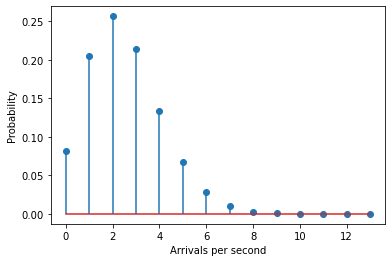

In [3]:
mu = 2.5 # mu = lambda/time
k = np.arange(0,14) # This is creating the range of x-axis
packet_distribution = stats.poisson(mu) # Creating poisson distribution
pmf_k = packet_distribution.pmf(k)
plt.stem(k,pmf_k) # Theoretical pmf
plt.xlabel("Arrivals per second")
plt.ylabel("Probability")
plt.show()

# sum of probabilities from k=0 to k=3
# print(f"Sum of probabilities from k=0 to k=3: {packet_distribution.pmf(np.arange(0,4)).sum() : 0.3f}")

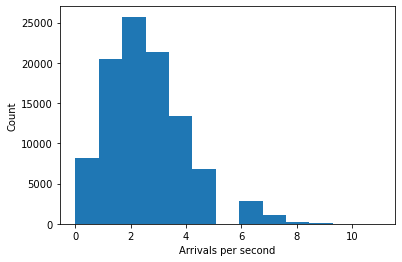

In [4]:
n_pts = int(100e3)
x = stats.poisson(mu).rvs(n_pts)
plt.hist(x, bins = 13)
plt.xlabel("Arrivals per second")
plt.ylabel("Count")
plt.show()

According to the graphs shown above, the theoretical results match the simulated results.
This means that the simulated numbers match the expectations set before the experiment.

#### Question 2

Poisson random process in which 5 arrivals per hour are expected.
Generate 100,000 random numbers reflecting the numbers of random arrivals in one minute.
Plot the histogram and determine how closely the numbers match what you would expect.
Also plot the histogram of the time between arrivals. Does that match what you expect?

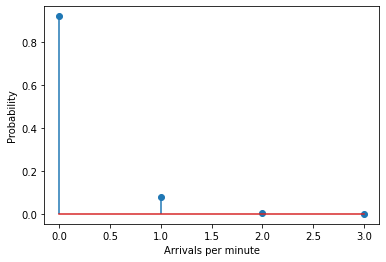

In [8]:
mu = 5/60 # mu = lambda/time
k = np.arange(0,4) # This is creating the range of x-axis
packet_distribution = stats.poisson(mu) # Creating poisson distribution
pmf_k = packet_distribution.pmf(k)
plt.stem(k,pmf_k) # Theoretical pmf
plt.xlabel("Arrivals per minute")
plt.ylabel("Probability")
plt.show()

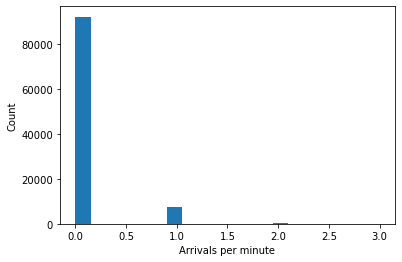

In [9]:
n_pts = int(100e3)
x = stats.poisson(mu).rvs(n_pts)
plt.hist(x, bins = 20)
plt.xlabel("Arrivals per minute")
plt.ylabel("Count")
plt.show()

#### Thoughts Question 2

From the results obtained above, it is possible to see that the theoretical results match the simulated results. It makes sense that every minute the probability of an arrival is 0 since there are only 5 arrivals every hour. 5 arrivals every hour means potentially an arrival every 12 minutes, so expecting no arrivals every minute is correct inference.

#### Question 3

